<a href="https://colab.research.google.com/github/manuelpope/MscIA/blob/main/Recommenders_and_clustering_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PEC1: Recomendadores y agrupación:**

Este archivo de cuaderno interactivo de jupyter le ayudará a comenzar con las operaciones básicas necesarias para resolver los ejercicios del PEC. Utilice este archivo para proporcionar una solución a los ejercicios (tanto el código como los comentarios escritos). Agregue tantas celdas de código y de texto como necesite para resolver todos los ejercicios. Asegúrate de que el archivo se puede ejecutar completamente antes de cargarlo para su entrega.

### Instalar las librerías suprise en google colab:

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 316kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617527 sha256=0d74c6703d6954737c1c54515025a781ce79aee3e6c6632316099fb40380a3a9
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


## **Ejercicio 1: Manipulación de datos con surprise and Pandas:**

Este primer ejercicio es para familiarizarse con el conjunto de datos de Jester y cómo realizar la manipulación básica de datos usando Pandas.


a) Cargar la base de datos Jester desde el surprise dataset

In [ ]:
from surprise import Dataset

data = Dataset.load_builtin('jester')

Convertir los datos a un Pandas dataframe

In [ ]:
import pandas as pd
df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id', 'item_id', 'rating', 'timestamp'])

Realizar inspección y manipulación básica de los datos:

Enumere las 10 primeras entradas del conjunto de datos:


In [ ]:
df.head(10) 

,user_id,item_id,rating,timestamp
0,1,5,0.219,None
1,1,7,-9.281,None
2,1,8,-9.281,None
3,1,13,-6.781,None
4,1,15,0.875,None
5,1,16,-9.656,None
6,1,17,-9.031,None
7,1,18,-7.469,None
8,1,19,-8.719,None
9,1,20,-9.156,None


¿Cuántas entradas hay en el conjunto de datos?

In [ ]:
df.shape[0] # 0: number of rows, 1: number of columns/variables

1761439

¿Cuántos usuarios y chistes hay en la base de datos?

In [ ]:
print('Number of users:')
df["user_id"].nunique() # number of users

Number of users:


59132

In [ ]:
print('Number of items:')
df["item_id"].nunique() # number of items

Number of items:


140

¿Cuál es la calificación del usuario con user_id = 1 de la chiste con item_id = 5?


In [ ]:
df.loc[(df["user_id"]=='1') & (df["item_id"]=='5')]

,user_id,item_id,rating,timestamp
0,1,5,0.219,None


b) Filtrar el conjunto de datos:

Filtre la base de datos manteniendo solo los elementos que hayan calificado al menos min_item_ratings usuarios y usuarios que hayan calificado al menos los elementos min_user_ratings:

In [ ]:
min_item_ratings = 200
filter_items = df['item_id'].value_counts() > min_item_ratings
filter_items = filter_items[filter_items].index.tolist()

min_user_ratings = 130
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_small = df[(df['item_id'].isin(filter_items)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_small.shape))

The original data frame shape:	(1761439, 4)
The new data frame shape:	(1325, 4)


Convierta el marco de datos de nuevo a una variable surprise utilizando las funciones reader y load_from_df:

https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset

In [ ]:
from surprise import Reader 
reader = Reader(rating_scale=(-10, 10))
data_small = Dataset.load_from_df(df_small[['user_id', 'item_id', 'rating']], reader)

Responde las siguientes preguntas:

- ¿Cuántos usuarios y elementos hay en el conjunto de datos reducido?


In [ ]:
dfs=data_small.df
dfs.shape[0]# numero total 

1325

In [ ]:
dfs["user_id"].nunique()

10

R:// numero total de usuarios en el grupo reducido

In [ ]:
dfs["item_id"].nunique() # number of items

133

- Proporcione una breve descripción de las principales características del conjunto de datos.



In [ ]:
dfs.describe()

,rating
count,1325.000000
mean,2.346844
std,5.032869
min,-9.844000
25%,-1.438000
50%,3.500000
75%,6.281000
max,9.969000


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 1568 to 27921
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  1325 non-null   object 
 1   item_id  1325 non-null   object 
 2   rating   1325 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.4+ KB


c) Proporcione una representación gráfica de la distribución del número de usuarios con un determinado número de valoraciones. ¿Cuáles son las principales conclusiones que se pueden sacar de este gráfico ?


In [ ]:
dfs.head()

,user_id,item_id,rating
1568,46,5,6.469
1569,46,7,-6.781
1570,46,8,8.625
1571,46,13,-8.062
1572,46,15,-4.156


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dfs.head()
dfs.groupby('user_id').mean()

,rating
user_id,
159,4.593955
227,3.519316
304,-0.312947
315,-1.302504
410,0.652901
442,3.515684
46,5.843301
476,2.484271
477,3.183782


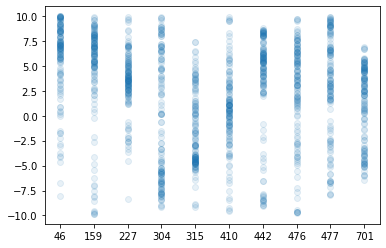

In [ ]:
fig,ax =plt.subplots()
ax.scatter(dfs.get('user_id'),dfs.get('rating'),alpha=0.1)
plt.show()

In [ ]:
#R:Con el grafico de dispersion podemos observar donde es mas propen so el usuario de puntear, puede ser un optimista , pesimista o neutro.

## **Ejercicio 2: Diferentes formas de diseñar un sistema de recomendación**
En este ejercicio estamos explorando diferentes formas de diseñar / entrenar un sistema de recomendación. A menos que se indique lo contrario, este ejercicio se realizará con el conjunto de datos reducido obtenido en el ejercicio anterior.


In [ ]:
from surprise import SVD
import numpy as np
from surprise.model_selection import cross_validate


a) Ajuste un recomendador de descomposición de valores singulares utilizando como datos de entrenamiento todo el conjunto de datos reducido. ¿Cuál es la tasa prevista de user_id = 46 del chiste con item_id = 44 ?. ¿Cuál es la discrepancia entre la qualificació prevista y la real? Evalúe el rendimiento de este enfoque utilizando RMSE, MAE y MSE como métricas de precisión.


In [ ]:
SVD_model = SVD()
cross_validate(SVD_model, data_small, measures=['RMSE', 'MAE','MSE'], cv=5, verbose=True)

Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.1921  4.5442  4.4288  4.8100  4.2764  4.4503  0.2171  
MAE (testset)     3.3525  3.6556  3.3878  3.8776  3.2926  3.5132  0.2206  
MSE (testset)     17.5735 20.6497 19.6144 23.1363 18.2877 19.8523 1.9554  
Fit time          0.07    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'fit_time': (0.06836271286010742,
  0.05824089050292969,
  0.055567026138305664,
  0.06095528602600098,
  0.05521082878112793),
 'test_mae': array([3.35251268, 3.65556833, 3.38778644, 3.87756531, 3.29264792]),
 'test_mse': array([17.57351149, 20.64973213, 19.61441079, 23.13632388, 18.28767804]),
 'test_rmse': array([4.19207723, 4.54419763, 4.42881596, 4.81002327, 4.27640948]),
 'test_time': (0.0020449161529541016,
  0.0017876625061035156,
  0.002060413360595703,
  0.0018050670623779297,
  0.001855611801147461)}

In [ ]:
data=data_small.build_full_trainset()
SVD_model.fit(data)

In [ ]:
valor_predict=SVD_model.predict(46,44)
print(SVD_model.predict(46,44))


user: 46         item: 44         r_ui = None   est = 2.35   {'was_impossible': False}


In [ ]:
filterui=dfs.query('user_id == "46" and item_id == "44"')
filterui

,user_id,item_id,rating
1578,46,44,6.75


In [ ]:
#Se observa una fuerte diferencia entre el valor esperado y el que se ha predicho. y
#este concuerda con nuestro rmse  promedio de 4.4.

In [ ]:
error_percert=np.absolute((valor_predict[3]-filterui['rating'])*100/filterui['rating'])
print('error porcentual', error_percert)

error porcentual 1578    65.231944
Name: rating, dtype: float64


In [ ]:
#Se obtuvieron diferentes MAE  y RMSE o MSE debido que la data presenta ourliers o alta varianza que 
#llega a afectar la medicion de RMSE y MAE es insensible a estas.

b) Ajuste el mismo recomendador pero ahora dividiendo los datos en subconjuntos de entrenamiento y prueba en tres proporciones diferentes (entrenamiento / prueba): 90/10, 75/25 y 10/90. Compare el RMSE, MAE y MSE promedio cuando utilice diferentes fracciones para los subconjuntos de entrenamiento y prueba. ¿Qué proporción produce mejores resultados de predicción? Justifica tu respuesta.


In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split
#division subgrupos
t_90_10, test_90_10 = train_test_split(data_small, test_size=.10)
t_75_25, test_75_25 = train_test_split(data_small, test_size=.25)
t_10_90, test_10_90 = train_test_split(data_small, test_size=.90)



In [ ]:
# Precision grupo train 90%
algo90 = SVD()
algo90.fit(t_90_10)
predictions90 = algo90.test(test_90_10)

# Computacion de errores
print(accuracy.rmse(predictions90),accuracy.mae(predictions90),accuracy.mse(predictions90))


RMSE: 4.6460
MAE:  3.5684
MSE: 21.5853
4.646000844248637 3.568445724543712 21.58532384475905


In [ ]:
# Precision grupo train 75%
algo75 = SVD()
algo75.fit(t_75_25)
predictions75 = algo75.test(test_75_25)
# Computacion de errores
print(accuracy.rmse(predictions75),accuracy.mae(predictions75),accuracy.mse(predictions75))


RMSE: 4.5635
MAE:  3.5743
MSE: 20.8259
4.563534942019094 3.5742950274140957 20.825851167029214


In [ ]:
# Precision grupo train 10%
algo10 = SVD()
algo10.fit(t_10_90)
predictions10 = algo10.test(test_10_90)
# Computacion de errores
print(accuracy.rmse(predictions10),accuracy.mae(predictions10),accuracy.mse(predictions10))


RMSE: 4.6481
MAE:  3.7675
MSE: 21.6044
4.648055982351023 3.767462200683949 21.604424415069136


***Respuesta:***
Parecen resultados similares midiendo el MAE, pero observamos una gran variacion con MSE respecto al RMSE. Demostrando la alta varianza y cantidad de outliers, si tuvieramos que elegir un modelo seria el 75/25 este presenta las medidas de errores menores.






c) Ajuste y evalúe ahora el recomendador de SVD utilizando un procedimiento de validación cruzada de 5 veces (cv = 5). Compare los resultados medios con el rendimiento obtenido en los apartados anteriores. Explique las diferencias de forma razonada.


In [ ]:
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate


# define a cross-validation iterator
kf = KFold(n_splits=5)

algonFolds = SVD()

for trainset, testset in kf.split(data_small):

    # train and test algorithm.
    algonFolds.fit(trainset)
    predictions = algonFolds.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

cross_validate(algonFolds, data_small, measures=['RMSE', 'MAE','MSE'], cv=5, verbose=True)


RMSE: 4.0845
RMSE: 4.7985
RMSE: 4.6420
RMSE: 4.3308
RMSE: 4.2900
Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.2319  4.7553  4.2916  4.2002  4.6864  4.4331  0.2378  
MAE (testset)     3.3629  3.6087  3.4562  3.1689  3.7959  3.4785  0.2133  
MSE (testset)     17.9088 22.6131 18.4176 17.6419 21.9628 19.7088 2.1305  
Fit time          0.06    0.05    0.05    0.06    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'fit_time': (0.05814337730407715,
  0.05459117889404297,
  0.054206132888793945,
  0.05621671676635742,
  0.06164145469665527),
 'test_mae': array([3.36294523, 3.60873558, 3.45621283, 3.16887079, 3.79591143]),
 'test_mse': array([17.90876819, 22.61312718, 18.41761383, 17.64185495, 21.96280032]),
 'test_rmse': array([4.23187526, 4.75532619, 4.29157475, 4.20022082, 4.68644858]),
 'test_time': (0.002794027328491211,
  0.0018341541290283203,
  0.0018320083618164062,
  0.004400491714477539,
  0.0018906593322753906)}

***Respuesta: ***
Como se puede observar la media fue menor en las tres medidas de errores que puntos anteriores, es una buena forma de evitar que los outliers arruinen las medidas de error.




d) Use una validación cruzada de 5 veces para comparar el desempeño de las versiones sesgadas e imparciales del recomendador de SVD descrito en https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization. SVD. ¿Qué método proporciona una mejor precisión de predicción? ¿Por qué?


In [ ]:
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import SVDpp



# define a cross-validation iterator
kf = KFold(n_splits=5)

algonFolds = SVDpp()

for trainset, testset in kf.split(data_small):

    # train and test algorithm.
    algonFolds.fit(trainset)
    predictions = algonFolds.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

cross_validate(algonFolds, data_small, measures=['RMSE', 'MAE','MSE'], cv=5, verbose=True)


RMSE: 4.6243
RMSE: 4.6338
RMSE: 4.2878
RMSE: 4.6847
RMSE: 4.3997
Evaluating RMSE, MAE, MSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.7257  4.5398  4.4836  4.7095  4.1761  4.5269  0.1990  
MAE (testset)     3.6160  3.5164  3.4197  3.6363  3.4401  3.5257  0.0884  
MSE (testset)     22.3327 20.6099 20.1023 22.1793 17.4397 20.5328 1.7725  
Fit time          1.43    1.43    1.42    1.44    1.43    1.43    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


{'fit_time': (1.4273407459259033,
  1.430363655090332,
  1.41572904586792,
  1.4359772205352783,
  1.425424575805664),
 'test_mae': array([3.61604989, 3.51641242, 3.41972442, 3.63634991, 3.44006192]),
 'test_mse': array([22.33269755, 20.60987643, 20.10231476, 22.17928663, 17.43969269]),
 'test_rmse': array([4.72574836, 4.53981018, 4.4835605 , 4.709489  , 4.17608581]),
 'test_time': (0.030210018157958984,
  0.029132604598999023,
  0.029407024383544922,
  0.029073715209960938,
  0.029963970184326172)}

***Respuesta:: ***

Se observa que el metodo SVDpp tiene mayor error, siendo mejor el modelo anterior de SVD, esto es debido que toma mayor penalidad sobre outliers haceindo que el sistema se aleja mas de un ajuste optimo.


## **Ejercicio 3: Comparar algoritmos de agrupamiento con datos sintéticos**
En esta sección, comparará dos de los algoritmos de agrupación en clúster más comunes que utilizan datos generados sintéticamente.



a) Utilice la función make_blobs de la biblioteca sklearn para generar 1500 observaciones bidimensionales distribuidas equitativamente en tres grupos centrados en las posiciones (0,0), (4,4) y (6,6). La descripción de la función se puede encontrar aquí:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1500, centers=[(0,0),(4,4),(6,6)], n_features=2,random_state=0)

In [ ]:
len(X),len(y)


(1500, 1500)

b) Agrupar los datos usando un algoritmo de k-medias con k = 3 y un método de agrupamiento jerárquico / aglomerativo con tres grupos. Represente gráficamente los resultados con diagramas de dispersión usando diferentes colores para cada uno de los grupos identificados por los dos métodos. Compare los resultados de la agrupación en clústeres. ¿Qué método es mejor cuando el verdadero centroide de los grupos se acerca?


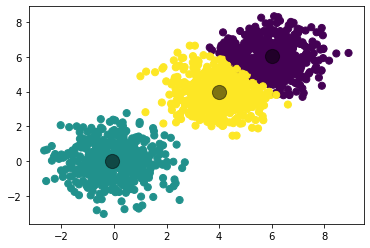

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_predict=kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

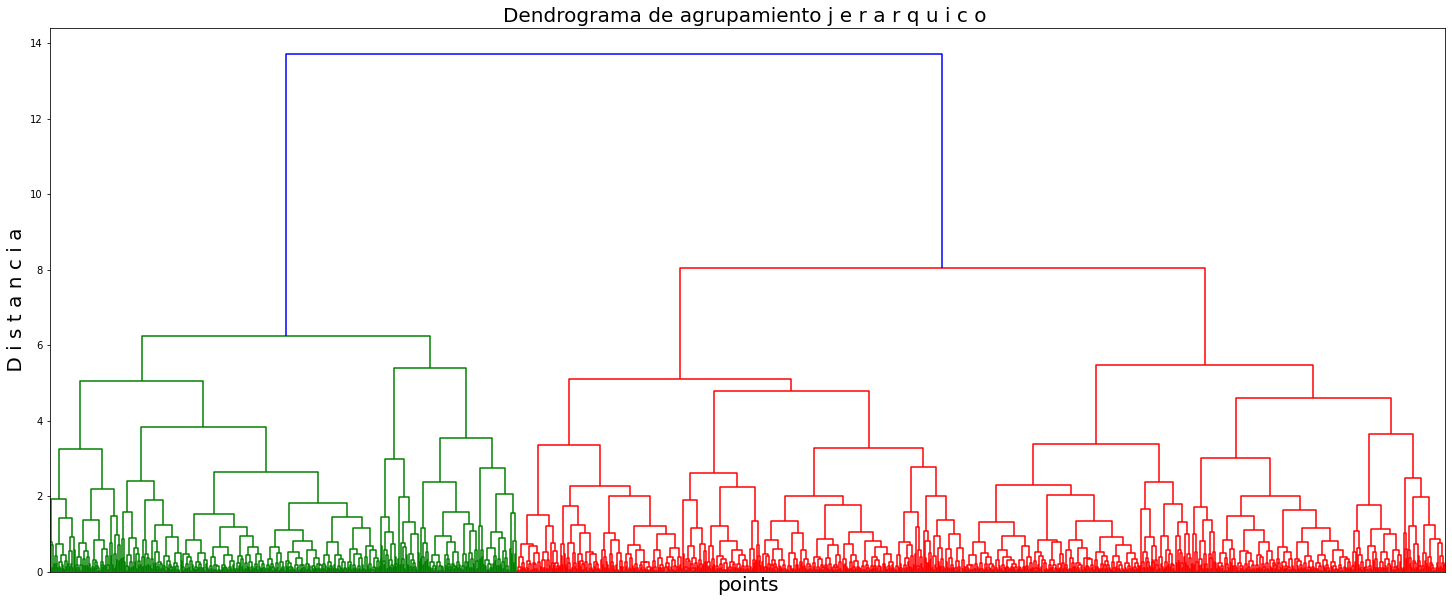

In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage
from matplotlib import pyplot as plt
# Ge nerar l a m a t r i z de e n l a c e ( e n l a c e c o m p l e t o )
enlace = linkage ( X , method = 'complete' , metric =  'euclidean'  )
plt.figure ( figsize =(25 , 10 ) )
plt.title ( 'Dendrograma de agrupamiento j e r a r q u i c o ', fontsize =20)
plt.xlabel ( 'points' , fontsize =20)
plt.ylabel ( ' D i s t a n c i a ', fontsize =20)
dendrogram ( enlace , orientation = 'top' , no_labels = True )
plt.show( )

***Respuesta***

Observando los resultados de los clusters , el kmeans termina siendo mas eficaz para determinar los grupos y a su vez los centros (centroides) de los puntos.


c) Repita las tareas de las dos secciones anteriores, pero ahora genere las observaciones con las siguientes varianzas desiguales: 1, 2.5 y 0.5 respectivamente. Comente los resultados.

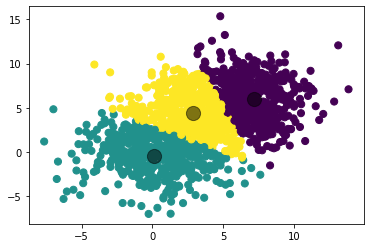

In [ ]:
X, y = make_blobs(n_samples=1500, centers=[(0,0),(4,4),(6,6)],
                  n_features=2,random_state=1,cluster_std=2.5)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
y_predict=kmeans.predict(X)
y_predict
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

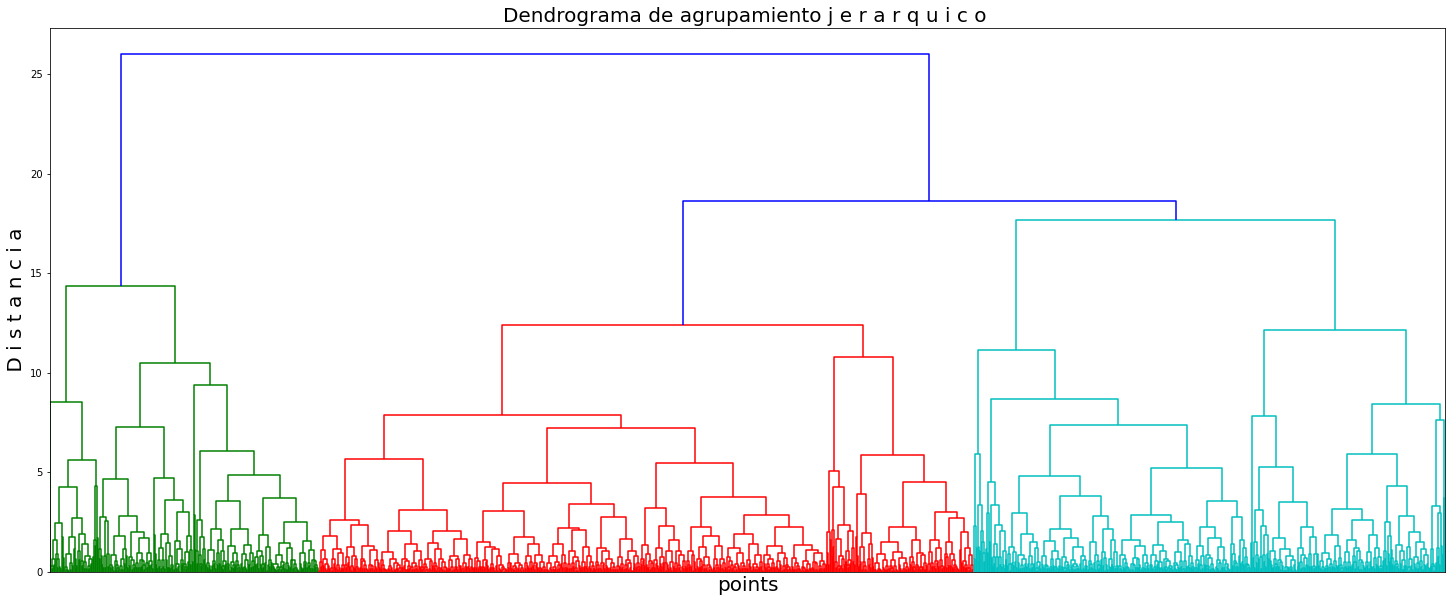

In [ ]:
# Ge nerar l a m a t r i z de e n l a c e ( e n l a c e c o m p l e t o )
enlace = linkage ( X , method = 'complete' , metric =  'euclidean'  )
plt.figure ( figsize =(25 , 10 ) )
plt.title ( 'Dendrograma de agrupamiento j e r a r q u i c o ', fontsize =20)
plt.xlabel ( 'points' , fontsize =20)
plt.ylabel ( ' D i s t a n c i a ', fontsize =20)
dendrogram ( enlace , orientation = 'top' , no_labels = True )
plt.show( )

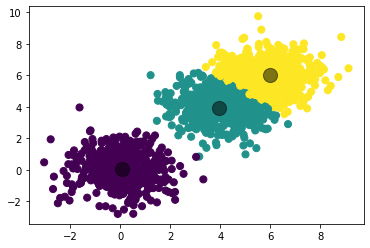

In [ ]:
X, y = make_blobs(n_samples=1500, centers=[(0,0),(4,4),(6,6)],
                  n_features=2,random_state=1,cluster_std=1.0)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
y_predict=kmeans.predict(X)
y_predict
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

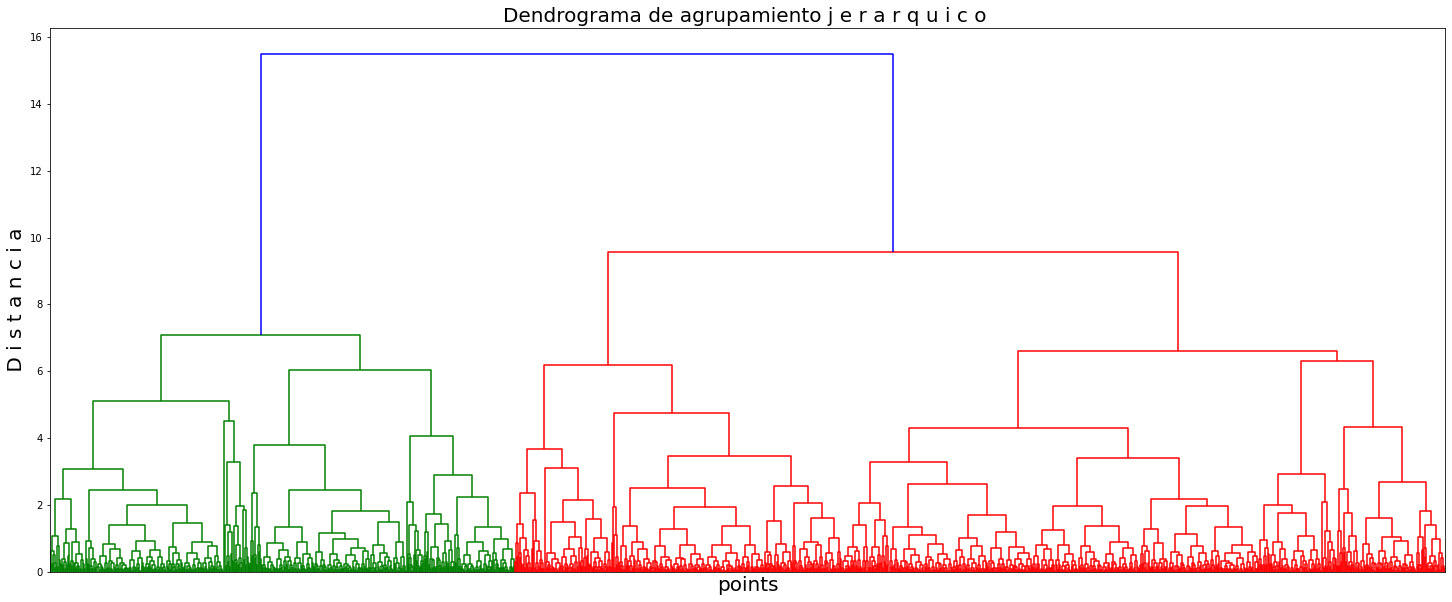

In [ ]:
# Ge nerar l a m a t r i z de e n l a c e ( e n l a c e c o m p l e t o )
enlace = linkage ( X , method = 'complete' , metric =  'euclidean'  )
plt.figure ( figsize =(25 , 10 ) )
plt.title ( 'Dendrograma de agrupamiento j e r a r q u i c o ', fontsize =20)
plt.xlabel ( 'points' , fontsize =20)
plt.ylabel ( ' D i s t a n c i a ', fontsize =20)
dendrogram ( enlace , orientation = 'top' , no_labels = True )
plt.show( )

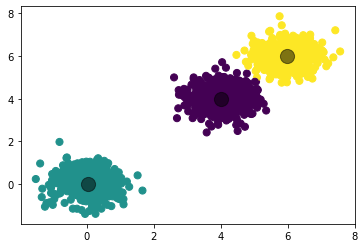

In [ ]:
X, y = make_blobs(n_samples=1500, centers=[(0,0),(4,4),(6,6)],
                  n_features=2,random_state=1,cluster_std=0.5)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
y_predict=kmeans.predict(X)
y_predict
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

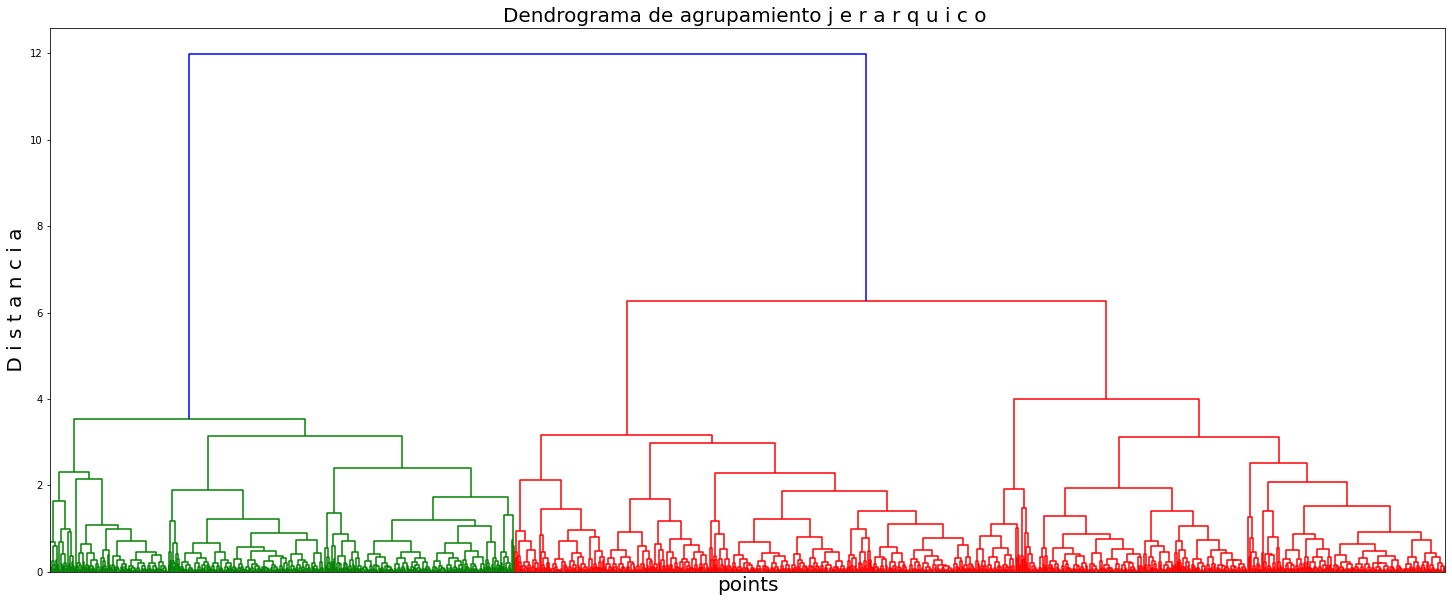

In [ ]:
# Ge nerar l a m a t r i z de e n l a c e ( e n l a c e c o m p l e t o )
enlace = linkage ( X , method = 'complete' , metric =  'euclidean'  )
plt.figure ( figsize =(25 , 10 ) )
plt.title ( 'Dendrograma de agrupamiento j e r a r q u i c o ', fontsize =20)
plt.xlabel ( 'points' , fontsize =20)
plt.ylabel ( ' D i s t a n c i a ', fontsize =20)
dendrogram ( enlace , orientation = 'top' , no_labels = True )
plt.show( )

***Respuesta::***

Al generar sinteticamente los datos con diferentes desviaciones estandars podemos observar facilmente que kmeans siempre pudo separar e indentificar los centroides a pesar de la diferente dispersion de la data en cada bloque , mientras que la estructura de arbol solo en una situacion pudo determinar los 3 grupos correspondientes.